# PEP-8 Code Styling

In [9]:
!pip3 install flake8 pycodestyle_magic

In [10]:
%load_ext pycodestyle_magic

In [11]:
%pycodestyle_on #or %flake8_on

In [8]:
lst = [i**2 for i in range(1, 10001)]

## Часть 1. А как считать?


### Арифметические выражения. Инфиксная, постфиксная и префиксная нотации

Рассмотрим арифметическое выражение

   $$(2-3)*(12-10)+4/2$$

Его значение легко вычисляется и оказывается даже целым - это 0. Это привычная для нас формазаписи арифметических выражений, в которой если операция бинарная (т.е. требует 2 аргументов, например, сложение, деление), то один аргумент пишется перед знаком операции, а другой - после неё. Такая форма записи называется инфиксной.

Нотация (способ записи), в которой операнды пишутся перед знаком операции - называется постфиксной или обратной польской.

Нотация. в которой операнды пишутся после знака операции - прямой польской или префиксной.

Например, уже рассмотренное выражение в обратной польской записи будет выглядеть как

 $$2 \, 3 - \, 12 \, 10 - \, * \, 4 \, 2 \, / \, +$$

После пары 2 и 3 стоит знак вычитания. После пары 12 и 10 - тоже. Далее стоит знак перемножения, потому что результаты этих двух операций надо умножить. Далее стоят 4 и 2 и после них знак деления. А после - знак сложения, показывающий, что результат предыдущего нужно сложить с результатом деления 4 на 2.

а в прямой польской как

 $$+ * - \, 2 \, 3 - 12 \, 10 \, / \, 4 \, 2$$

Аналогичным образом, только теперь знак операции стоит перед операндами (или их описаниями в виде выражений в той же форме записи).



### Стековый калькулятор

Стековый калькулятор - это устройство (реальное или виртуальное), которрое вычисляет значения арифметических выражений, записанных в постфиксной форме. Стековым он называется по понятным причинам: если нам встречается число - мы должны поместить его в стек; если знак опренрации - мы должны достать из стека столько чисел, сколько необходимо для выполнения данной операции. Именно так и работает т.н. математический сопроцессор (например, в процессорах архитектуры x86 и AMD64)- часть ЦП, отвечающая за операции над числами с плавающей запятой.

### Сортировочная станция Дейкстры

Как нетрудно видеть: выражения в обратной польской записи удобны для чтения компьютером , но неудобны для чтения и составления людьми. Поэтому хотелось бы доверить труд составления постфиксной формы выражений по их привычной инфиксной форме компьютеру. Это можно сделать с помощью так называемого алгоритма сортировочной станции (Shunting Yard algorithm , придуман Э. Дейкстрой в 1961 году, см <https://en.wikipedia.org/wiki/Shunting-yard_algorithm>).

В следующем примере, взятом из Википедии, разбирается преобразование выражения

$$a+b*c-d$$

Есть сортировочная станция с 3 путями: 2 подъездных и 1 тупик. С правого подъездного пути едут выражения: в каждом \"вагоне\" или операнд или знак операции. Операнды свободно проезжают в левый путь (образуя очередь), а операторы заезжают в тупик.

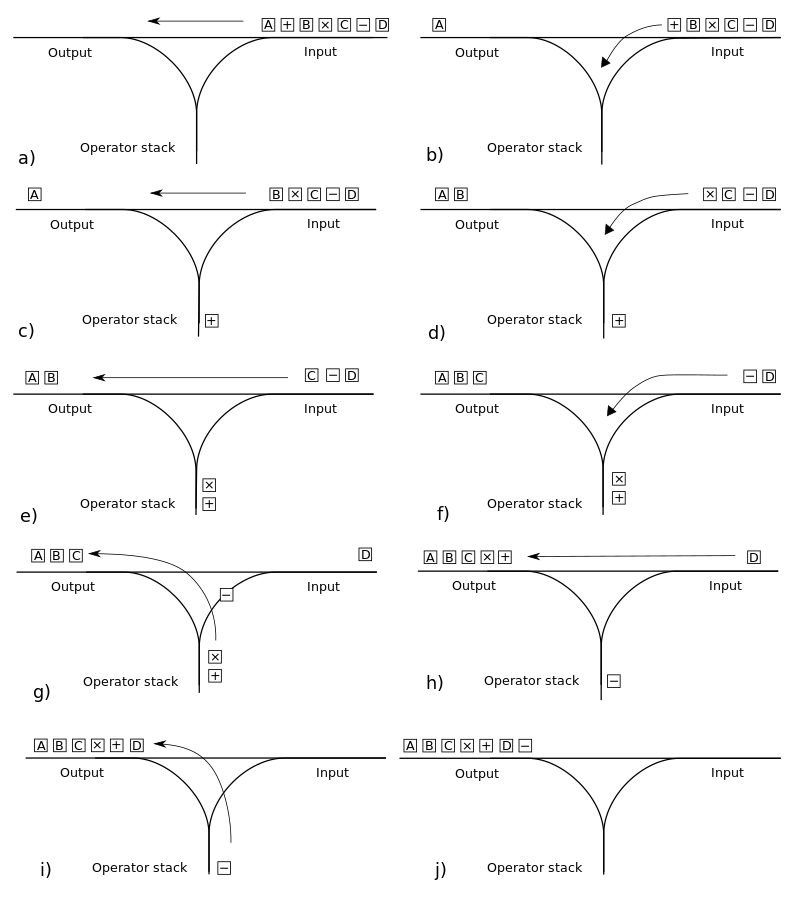

<https://commons.wikimedia.org/w/index.php?curid=10960619>

Если приоритет входящего оператора ниже приоритета того, что на вершине стека (на входе в тупик), то из стека достаётся оператор с большим приоритетом (на шаге g это умножение). То же самое происходит, если приооритет приходящего оператора равен приоритету такового на вершине стека, но тот, что на вершине - ассоциативен. В данном случае после отъезда умножения остаётся сложение, приоритет которого равен приоритету вычитания, но сложение в отличие от вычитания ассоциативно:

$$(a+b)+с=a+(b+c)
(a-b)-c!=a-(b-c)=a-b+c$$



# Часть 2. Для закрепления ООП



## Дополнительные вещи о функциях и классах

### Функции от произвольного количества аргументов

Наверняка в ходе решения задач вы задавались вопросом: как можно сделать функцию, которая способна принимать разное, заранее неизвестное количество аргументов?

Что же, пора вскрыть покровы, познакомьтесь с *args и **kwargs!

- ``*args`` используется для передачи неопределенного числа неименованных аргументов. Если поставить звездочку перед именем, это имя будет представлять собой кортеж из всех переданных аргументов функции.

In [15]:
def function(*args):
    for i in args:
        print(i)


print(function(1, 2, 3, 4))

В приведенном выше примере, args — это кортеж (1, 2, 3, 4).

- ``**kwargs`` работает так же, как и ``*args``, но вместо кортежа используется словарь. Это позволяет функции принимать любое количество именованных аргументов.

In [16]:
def function(**kwargs):
    for name, value in kwargs.items():
        print(f'{name} = {value}')


function(a=1, b=2, c=3)

В этом примере, kwargs — это словарь {'a': 1, 'b': 2, 'c': 3}.

- Функция может быть определена как принимающая и ``*args``, и ``**kwargs``. В таком случае она будет принимать сначала произвольное количество неименованных элементов, а потом произвольное количество именованных. Важно: конструкцию ``**kwargs`` нельзя располагать до ``*args``. Если это сделать — будет выдано сообщение об ошибке.


In [32]:
def function(*args, **kwargs):
    for i in args:
        print(i)
    for name, value in kwargs.items():
        print(f'{name} = {value}')


function(1,2,3,a=1, b=2, c=3)

1
2
3
a = 1
b = 2
c = 3


### Функции как объекты
В Python все является объектом, включая функции. Это означает, что функции можно передавать в качестве аргументов другим функциям как и любой другой объект. Функции, которые можно передавать в качестве аргументов или возвращать из других функций, известны как объекты первого класса. Это означает, что их можно передавать в качестве аргументов другим функциям, возвращать как значения из других функций и хранить в переменных или структурах данных как любой другой объект. В принципе, функции можно воспринимать просто как класс, для которого определена **операция вызова (call)** -- ``(arg1, arg2,...)`` .
Пример использования функции как объекта первого класса:

In [30]:
def hello(name):
    print(f"Hello, {name}!")

greeting_function = hello
greeting_function("User")

Hello, User!


Рассмотрим другой пример с передачей функции в качестве аргумента другой функции:


In [1]:
def apply_function(numbers, function):
    results = []
    for number in numbers:
        result = function(number)
        results.append(result)
    return results

def square(number):
    return number ** 2

numbers = [1, 2, 3, 4, 5]
squared_numbers = apply_function(numbers, square)
print(squared_numbers)

[1, 4, 9, 16, 25]


В этом примере функция `apply_function` принимает в качестве аргументов список чисел и функцию. Функция `apply_function` применяет переданную функцию к каждому числу в списке и возвращает новый измененный список. Функция `square` возводит число в квадрат, и используется в качестве аргумента функции `apply_function`.

Объекты первого класса также позволяют возвращать функции из другой функции:


In [28]:
def make_multiplier(n):
    def multiplier(x):
        return x * n
    return multiplier

times_2 = make_multiplier(2)
times_3 = make_multiplier(3)

print(times_2(5)) # 10
print(times_3(5)) # 15

10
15


В этом примере функция `make_multiplier` принимает число `n` и возвращает новую функцию, которая умножает свой аргумент на `n`. Затем эта функция применяется, чтобы создать две новые функции `times_2` и `times_3`, которые умножают свой аргумент на `2` и `3` соответственно. В итоге вызывается функция с аргументом `5`, чтобы увидеть их результаты.

Функции, которые принимают другие функции в качестве аргументов и/или возвращают функции в качестве результатов, называются функциями высшего порядка. Их можно использовать для инкапсуляции многократно используемого поведения и создания более абстрактного кода, о котором легче рассуждать.

Например, встроенные функции ``map`` и ``filter`` в Python являются функциями высшего порядка, которые работают с итерируемыми объектами и применяют принимаемую функцию к каждому элементу итерируемого объекта.

### Лямбда-функции

В Python лямбда функция — это небольшая анонимная функция, которая может быть определена без имени. Лямбда-функции часто используются там, где требуется небольшая, одноразовая функция. Синтаксис для определения лямбда-функции в Python следующий:
```python
lambda arguments: expression
```
Здесь `arguments` — это список входных аргументов функции, который разделен запятыми. А `expression` — это тело функции, значение которой возвращает лямбда-функция.

Например, лямбда-функция, которая принимает два аргумента и возвращает их сумму, может быть определена следующим образом:


In [17]:
summ = lambda x, y: x + y

1:1: E731 do not assign a lambda expression, use a def


А вызывать мы ее будем как обычную функцию:

In [19]:
result = summ(2, 3)
print(result)

Лямбда-функции могут иметь любое количество аргументов, но у каждой может быть только одно выражение. Выражение вычисляется и возвращается. Эти функции могут быть использованы везде, где требуется объект-функция. Например, мы можем использовать `map` чтобы быстро возвести все элементы списка в квадрат:

In [21]:
numbers = [1, 2, 3, 4, 5]
squares = map(lambda x: x**2, numbers)
print(list(squares))

[1, 4, 9, 16, 25]


Еще есть удобная функция `filter`, которая хорошо комбинируется с лямбдами.

In [19]:
# Без лямбды:
def even_fn(x):
    return x % 2 == 0

print(list(filter(even_fn, [1, 3, 2, 5, 20, 21])))


[2, 20]


In [20]:
# С лямбдой:
print(list(filter(lambda x: (x % 2 == 0), [1, 3, 2, 5, 20, 21])))

[2, 20]


### Декораторы

Декораторы — это, по сути, "обёртки", которые дают нам возможность изменить поведение функции, не изменяя её код. Пример:

In [4]:
def my_decorator(function_to_decorate):
    # Внутри себя декоратор определяет функцию-"обёртку". Она будет обёрнута вокруг декорируемой,
    # получая возможность исполнять произвольный код до и после неё.
    def wrapper():
        print("Я - код, который отработает до вызова функции")
        function_to_decorate() # Сама функция
        print("А я - код, срабатывающий после")
     # Вернём эту функцию
     
    return wrapper
    
def alone_function():
     print("Я простая одинокая функция, ты ведь не посмеешь меня изменять?")

# Однако, чтобы изменить её поведение, мы можем декорировать её, то есть просто передать декоратору,
# который обернет исходную функцию в любой код, который нам потребуется, и вернёт новую,
# готовую к использованию функцию:
function_decorated = my_decorator(alone_function)
function_decorated()



Я - код, который отработает до вызова функции
Я простая одинокая функция, ты ведь не посмеешь меня изменять?
А я - код, срабатывающий после


Можем даже сделать вот так, чтобы каждый раз во время вызова alone_function, вместо неё вызывалась function_decorated:

In [5]:
alone_function = my_decorator(alone_function)
alone_function()

Я - код, который отработает до вызова функции
Я простая одинокая функция, ты ведь не посмеешь меня изменять?
А я - код, срабатывающий после


Для упрощения таких действий существует специальный синтаксис декораторов. Вот так можно было записать предыдущий пример, используя его:

In [6]:
@my_decorator
def another_alone_function():
     print("Оставь меня в покое")

another_alone_function()

Я - код, который отработает до вызова функции
Оставь меня в покое
А я - код, срабатывающий после


Один из важных фактов, которые следует понимать, заключается в том, что функции и методы в Python — это практически одно и то же, за исключением того, что методы всегда ожидают первым параметром ссылку на сам объект (self). Это значит, что мы можем создавать декораторы для методов точно так же, как и для функций, просто не забывая про self.

In [7]:
def method_friendly_decorator(method_to_decorate):
    def wrapper(self, lie):
        lie -= 3
        return method_to_decorate(self, lie)
    return wrapper

class Lucy:
    def __init__(self):
        self.age = 32
    @method_friendly_decorator
    def sayYourAge(self, lie):
        print(f"Мне {self.age + lie} лет")

l = Lucy()
l.sayYourAge(-3)

Мне 26 лет


Конечно, если мы создаём максимально общий декоратор и хотим, чтобы его можно было применить к любой функции или методу, то можно воспользоваться распаковкой аргументов:

In [8]:
def a_decorator_passing_arbitrary_arguments(function_to_decorate):
    # Данная "обёртка" принимает любые аргументы
    def a_wrapper_accepting_arbitrary_arguments(*args, **kwargs):
        print("Передали ли мне что-нибудь?:")
        print(args)
        print(kwargs)
        function_to_decorate(*args, **kwargs)
    return a_wrapper_accepting_arbitrary_arguments

@a_decorator_passing_arbitrary_arguments
def function_with_no_argument():
    print("Python is cool, no argument here.")

function_with_no_argument()
#Передали ли мне что-нибудь?:
#()
#{}
#Python is cool, no argument here.

@a_decorator_passing_arbitrary_arguments
def function_with_arguments(a, b, c):
    print(a, b, c)
    
function_with_arguments(1, 2, 3)
#Передали ли мне что-нибудь?:
#(1, 2, 3)
#{}
#1 2 3

Передали ли мне что-нибудь?:
()
{}
Python is cool, no argument here.
Передали ли мне что-нибудь?:
(1, 2, 3)
{}
1 2 3


### Встроенные декораторы Python

`@staticmethod` - указывает на метод, который не действует в рамках экземпляра класса (т.е., не использует `self`). Статические методы вызываются для самого класса, а не для экземпляра класса.

In [1]:
class MathOperations:
    @staticmethod
    def add(x, y):
        return x + y

# Using the static method
res = MathOperations.add(5, 3)
print(res)

8


`@classmethod` - используется для определения метода, который действует над самим классом (т.е. использует `cls`). Методы класса могут получать доступ к состоянию класса, которое применяется ко всем экземплярам класса, и изменять его.



In [6]:
class Employee:
    raise_amount = 1.05
    def __init__(self, name, salary):
        self.name = name
        self.salary = salary
        
    @classmethod
    def set_raise_amount(cls, amount):
        cls.raise_amount = amount

# Using the class method
zz = Employee
zz.set_raise_amount(1.10)
yy = Employee
print(Employee.raise_amount, zz.raise_amount, yy.raise_amount)
yy.set_raise_amount(2)
print(Employee.raise_amount, zz.raise_amount, yy.raise_amount)

1.1 1.1 1.1
2 2 2


`@property` - используется для определения метода как свойства (property), что позволяет обращаться к нему как к атрибуту. Это полезно для инкапсуляции реализации метода, обеспечивая при этом простой интерфейс.
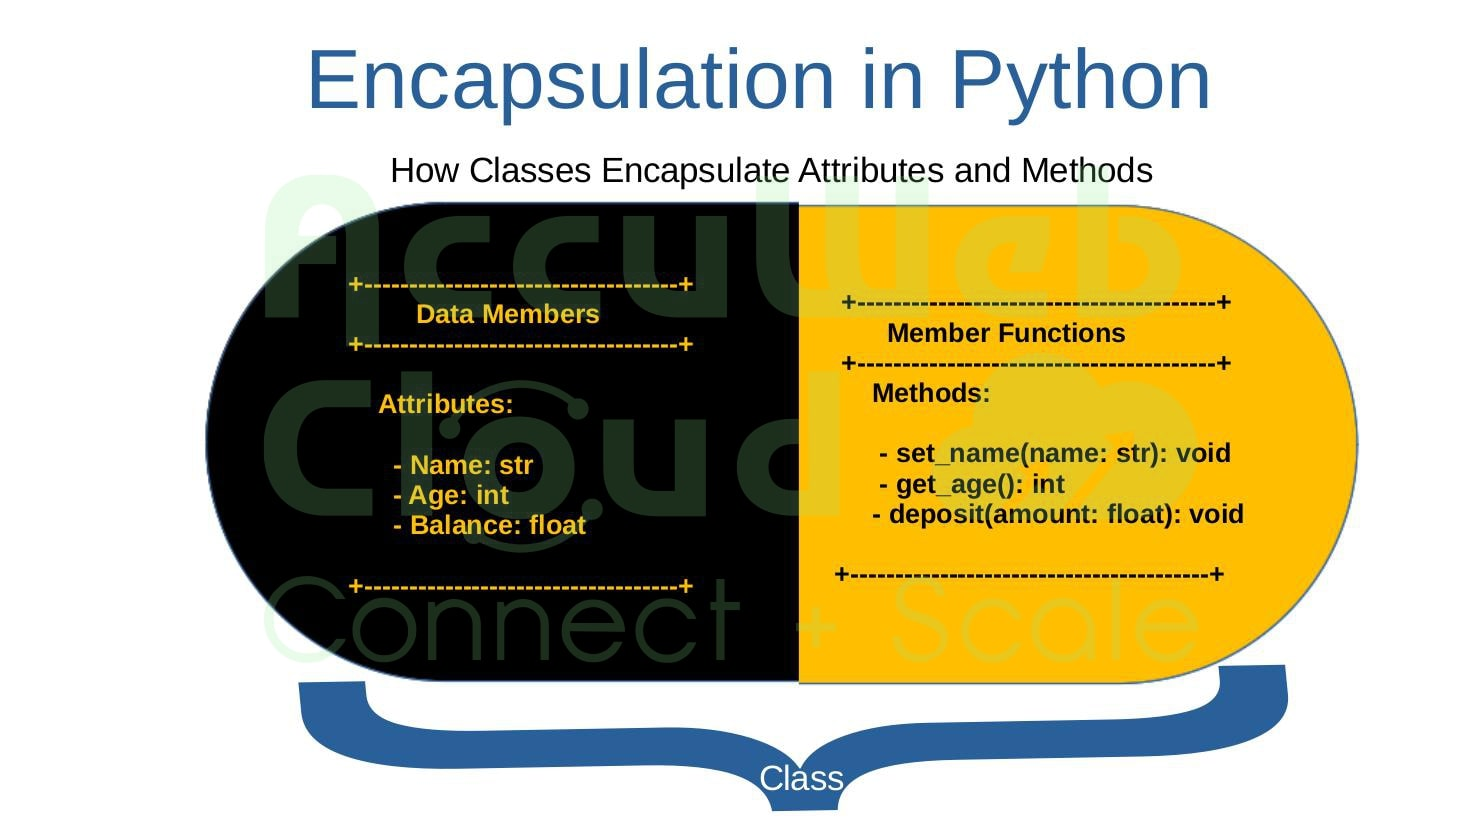

In [7]:
class Circle:
    def __init__(self, radius):
        self._radius = radius

    @property
    def radius(self):
        return self._radius

    @radius.setter
    def radius(self, value):
        if value >= 0:
            self._radius = value
        else:
            raise ValueError("Radius cannot be negative")

    @property
    def area(self):
        return 3.14159 * (self._radius ** 2)

# Using the property
c = Circle(5)
print(c.radius) 
print(c.area)    
c.radius = 10
print(c.area)

5
78.53975
314.159


### Практическое применение декораторов
 - Ведение журнала (логирование): отслеживание вызовов функций (например, @logger).
 - Аутентификация: ограничение доступа в веб-приложениях (например, Flask/Django).
 - Ограничение скорости: управление использованием API для каждого пользователя.
 - Кэширование: Сохранение результатов.
 - Повторные попытки исполнения кода: автоматический повтор неудачных сетевых вызовов.

# Упражнения

1. Напишите функцию, переводящую произвольное выражение, например

$$(3+4*(2-1))/5$$

в прямую и обратную польские нотации.

В общем и целом, любое выражение можно представить в виде структуры,
называемой деревом(синтаксическим деревом в данном случае, поскольку оно
отражает структуру выражения). Например, для разобранного выражения
синтаксическое дерево будет выглядеть так:

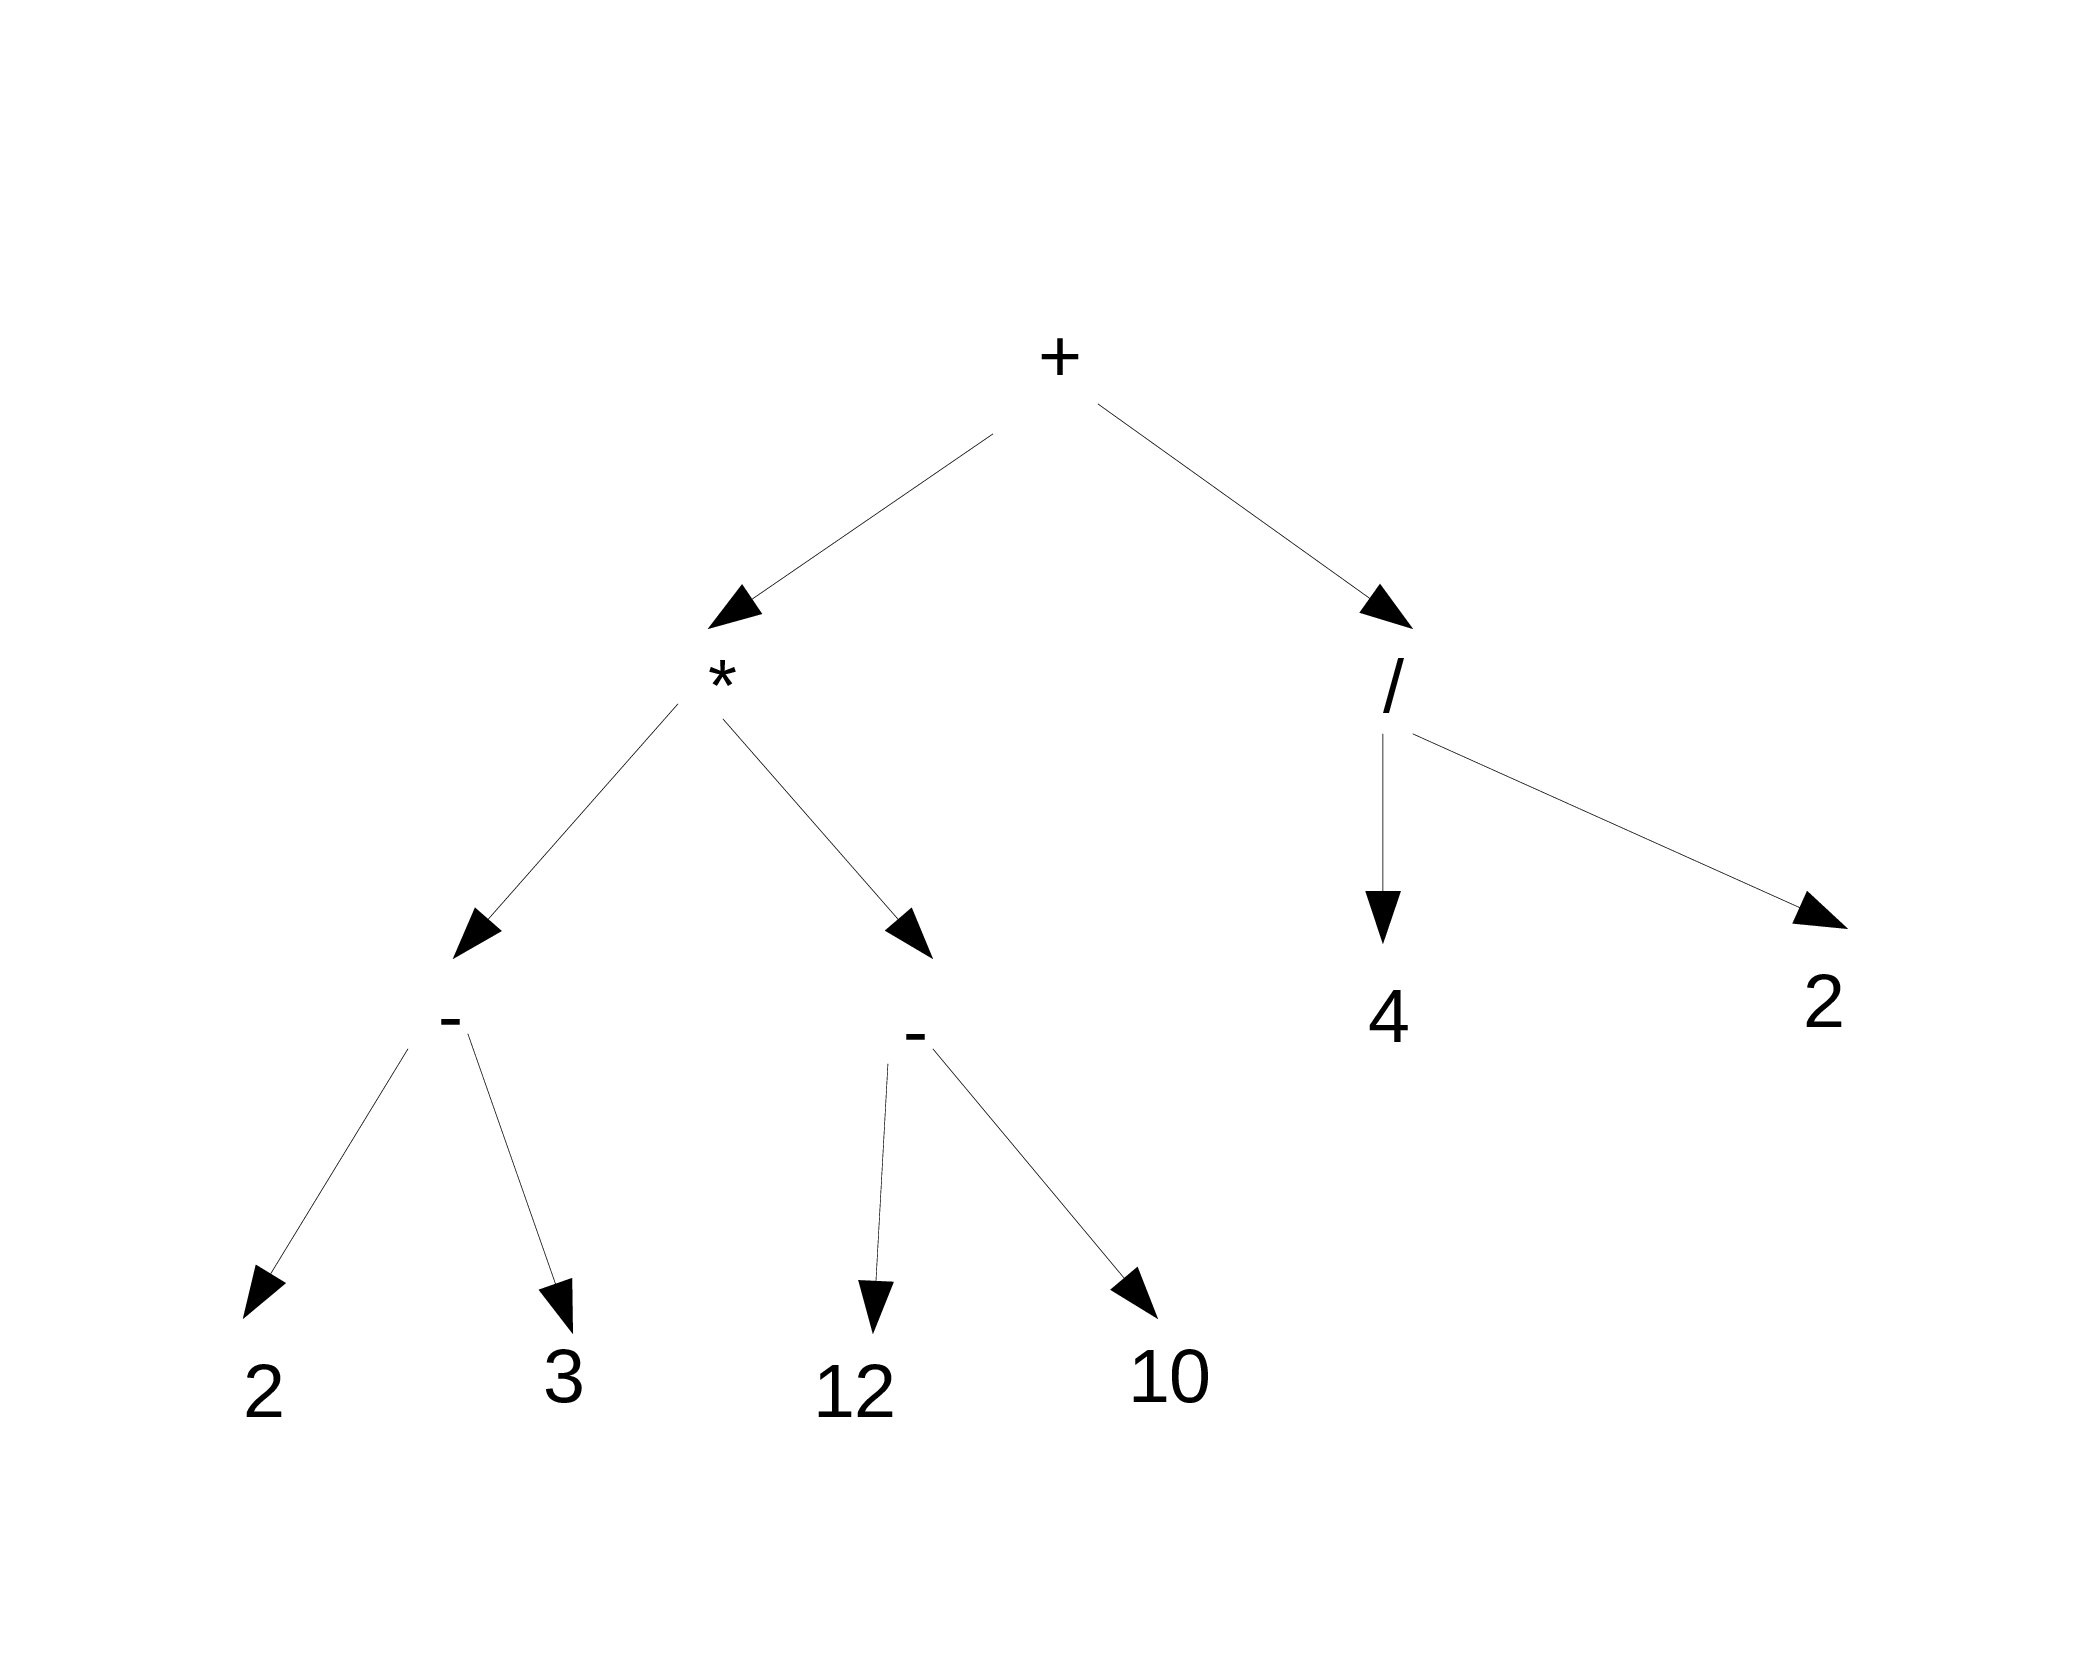

Его конечные вершины, листья (из которых стрелки никуда не идут) - это операнды, а промежуточные (из которых идут стрелки)- операции. Прямая польская запись (префиксная) получается, если читать это дерево сверху вниз. Обратная (постфиксная) - если читать снизу вверх.



In [49]:
s = str(input())
assert ' ' in s, 'without whitespaces'
s = s.replace('(', ')')
s = s.replace(') ', ')')
s = s.replace(' )', ')')
s = list(map(str, s.split(')')))
m = []
for j in s:
    if j != '':
        m.append(j)

s = []
for j in range(len(m)):
    w1 = list(map(str, m[j].split(' ')))
    if w1[0] in '+-/*':
        w2 = [w1[0]]
        w1 = w1[1:]
        if w1 != []:
            s.append(w1)
            s.append(w2)
        else:
            s.append(w2)
    else:
        s.append(w1)
for j in range(len(s)):
    dig = []
    zn = []
    for i in s[j]:
        if i in '+-/*':
            zn.append(i)
        else:
            dig.append(i)
    dig.extend(zn)
    s[j] = dig.copy()
ans = s.copy()
for j in range(len(s) - 1):
    if len(s[j]) == 1 and f == 0:
        k = s[j]
        m = s[j+1]
        s[j+1] = k
        s[j] = m
        f = 1
    else:
        f = 0
print(ans)
www = len([g for g in ans if len(g) == 1])
for sss in range(www):
    for j in range(len(ans)-1, 0, - 1):
        if len(ans[j]) == 1:
            k = ans[j]
            m = ans[j-1]
            ans[j-1] = k
            ans[j] = m
for h in range(len(ans)):
    if len(ans[h]) > 1:
        ans[h] = ans[h][-1:] + ans[h][:-1]
if www % 2 == 0:
    p = ans[1]
    q = ans[0]
    ans[0] = p
    ans[1] = q
print('postfix')
for i in s:
    print(*i, end=' ')
print('')
print('prefix')
for i in ans:
    print(*i, end=' ')

 (2 - 3) * (12 - 10) + 4 / 2


[['2', '3', '-'], ['*'], ['12', '10', '-'], ['4', '2', '/'], ['+']]
postfix
2 3 - 12 10 - * 4 2 / + 
prefix
+ * - 2 3 - 12 10 / 4 2 

2. Реализовать стековый калькулятор на python. Написать функцию, которая принимает выражение (в виде строки) в обратной польской нотации и считает его значение или пишет, что выражение составлено некорректно (если оно некорректно).

In [12]:
s = list(map(str, input().split()))
ste = []
for i in s:
    if i in '+/-*':
        assert len(ste) > 1, 'nekorrektno'
        if i == '-':
            a = ste[-2] - ste[-1]
        elif i == '+':
            a = ste[-1] + ste[-2]
        elif i == '/':
            a = ste[-2] / ste[-1]
        else:
            a = ste[-1] * ste[-2]
        ste.pop()
        ste.pop()
        ste.append(a)
    else:
        ste.append(int(i))
assert len(ste) == 1, 'nekorrektno'
print(*ste)

 2 3 - 12 10 - * 4 2 / +


0.0


In [ ]:
2 3 - 12 10 - * 4 2 / +

3. Реализовать алгоритм сортировочной станции для преобразования
произвольных арифметических выражений с 4 действиями (+,-,\*,/) из
инфиксной записи в обратную польскую.

In [22]:
tokens = list(map(str, input().split()))
output = []
stack = []
prec = {'+': 1, '-': 1, '*': 2, '/': 2}
for token in tokens:
    if token not in '+-*/':
        output.append(token)
    else:
        while (stack[-1] in '+-/*' and prec[stack[-1]] >= prec[token]):
            output.append(stack.pop())
        stack.append(token)
while stack:
    output.append(stack.pop())
print(*output)
#thank you yandex

 4 + 9


4 9 +


4. Вам предлагается реализовать **двусвязный** список, поддерживающий операции вставки элемента (в произвольную позицию, по индексу, куда происходит вставка), получения значения в элементе по индексу, удаления элемента (по индексу), а также для которого правильно определена базовая функция len(). 

В качестве основы и примера можете использовать [реализацию](https://habr.com/ru/companies/otus/articles/470828/) **односвязного** списка и модифицировать ее под нашу задачу.

In [ ]:
#не понял что от меня хотят перекопировал со ссылки

class Box:
    def __init__ (self,cat = None):
        self.cat = cat
        self.nextcat = None

    class LinkedList:
        def __init__(self):
            self.head = None
    
    def contains (self, cat):
        lastbox = self.head
        while (lastbox):
            if cat == lastbox.cat:
                return True
            else:
                lastbox = lastbox.nextcat
        return False
    
    def removeBox(self,rmcat):
    headcat = self.head
        if headcat is not None:
            if headcat.cat==rmcat:
                self.head = headcat.nextcat
                headcat = None
                return
        while headcat is not None:
            if headcat.cat==rmcat:
                break
            lastcat = headcat
            headcat = headcat.nextcat
        if headcat == None:
            return
        lastcat.nextcat = headcat.nextcat
        headcat = None